### Predictive Data Mining: A Structured Path to Cleaner Data and Stronger Models

In [ ]:
# 1. Load and Examine the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://github.com/fenago/datasets/raw/refs/heads/main/SHR65_23.zip')
print(df.shape)
df.sample(5)

(894636, 30)


,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
396629,202305001MA01202,"Plymouth, MA",MA01202,Massachusetts,Bridgewater,Municipal police,FBI,Yes,2023,May,...,White,Not of Hispanic origin,"Blunt object - hammer, club, etc",Neighbor,Other,NaN,0,0,92324.0,"Boston-Cambridge-Quincy, MA-NH"
480935,199402002MOKPD00,"Jackson, MO",MOKPD00,Missouri,Kansas City,Municipal police,FBI,No,1994,February,...,Unknown,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,0,0,81794.0,"Kansas City, MO-KS"
485163,197801012MOSPD00,"St. Louis city, MO",MOSPD00,Missouri,St. Louis,Municipal police,FBI,Yes,1978,January,...,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Robbery,NaN,0,0,30180.0,"St. Louis, MO-IL"
56663,200307001CA00403,"Butte, CA",CA00403,California,Gridley,Municipal police,FBI,Yes,2003,July,...,White,Hispanic origin,"Handgun - pistol, revolver, etc",Other - known to victim,Juvenile gang killings,NaN,1,1,31704.0,"Chico, CA"
782262,201709001TX12900,"Kaufman, TX",TX12900,Texas,Kaufman County,Sheriff,FBI,Yes,2017,September,...,White,Hispanic origin,Other or type unknown,Girlfriend,Circumstances undetermined,NaN,0,0,70618.0,"Dallas-Fort Worth-Arlington, TX"


In [ ]:
# 2. Generate a Comprehensive Data Quality Report (DQR)
import pandas as pd
import numpy as np

def generate_dqr1(df):
    # Initialize an empty DataFrame to store DQR1 results
    dqr1_df = pd.DataFrame(index=df.columns)

    # Basic Column Statistics
    dqr1_df['Missing_Values'] = df.isnull().sum()
    dqr1_df['Unique_Values'] = df.nunique()

    # Sample Value Counts (stored as a list to avoid multiple columns issue)
    dqr1_df['Sample_Value_Counts'] = df.apply(lambda x: list(x.value_counts().head(3).to_dict().items()))

    # Separate numeric and non-numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    non_numeric_df = df.select_dtypes(exclude=[np.number])

    # Descriptive Statistics for Numeric Columns Only
    descriptive_stats = numeric_df.describe().T
    stats_columns = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
    for col in stats_columns:
        dqr1_df[col] = descriptive_stats[col]

    # Convert stats columns to object type for safe assignment
    dqr1_df[stats_columns] = dqr1_df[stats_columns].astype(object)

    # Mark irrelevant stats for non-numeric columns
    dqr1_df.loc[non_numeric_df.columns, stats_columns] = 'N/A'

    # Correlation Analysis for Numeric Columns Only
    corr_matrix = numeric_df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    highly_correlated = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
    dqr1_df['Highly_Correlated'] = dqr1_df.index.isin(highly_correlated)

    # Variance Analysis for Numeric Columns Only
    variances = numeric_df.var()
    dqr1_df['High_Variance'] = dqr1_df.index.map(lambda x: variances[x] > 1.0 if x in variances else 'N/A')
    dqr1_df['Low_Variance'] = dqr1_df.index.map(lambda x: variances[x] < 0.01 if x in variances else 'N/A')

    # Potential Index Columns
    dqr1_df['Potential_Index'] = dqr1_df['Unique_Values'] > len(df) * 0.9

    # Additional Column Type Info
    dqr1_df['Data_Type'] = df.dtypes

    # Flag Columns for High Dimensionality
    high_dim_threshold = 200  # Fixed threshold of 200
    dqr1_df['High_Dimensionality_Risk'] = dqr1_df.apply(
        lambda row: row['Data_Type'] == 'object' and row['Unique_Values'] > high_dim_threshold, axis=1
    )

    # Display the complete Data Quality Report with all rows and columns
    pd.options.display.max_rows = None
    pd.options.display.max_columns = None
    display(dqr1_df)

    return dqr1_df

# 3.Generate the Data Quality Report
dqr1_df = generate_dqr1(df)

,Missing_Values,Unique_Values,Sample_Value_Counts,mean,std,min,25%,50%,75%,max,Highly_Correlated,High_Variance,Low_Variance,Potential_Index,Data_Type,High_Dimensionality_Risk
ID,0,852394,"[(197702001NY05904, 13), (199204001FL05003, 12...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,True,object,True
CNTYFIPS,0,3079,"[(Los Angeles, CA, 55681), (New York, NY, 4780...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,True
Ori,0,13442,"[(NY03030, 47790), (ILCPD00, 30509), (CA01942,...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,True
State,0,51,"[(California, 129741), (Texas, 86288), (New Yo...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Agency,0,10015,"[(New York, 47790), (Chicago, 30509), (Los Ang...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,True
Agentype,0,8,"[(Municipal police, 692613), (Sheriff, 150999)...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Source,0,2,"[(FBI, 855718), (MAP, 38918)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Solved,0,2,"[(Yes, 632457), (No, 262179)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Year,0,48,"[(1993, 24337), (1992, 23793), (2021, 23699)]",1998.868617,14.134767,1976.0,1987.0,1997.0,2011.0,2023.0,False,True,False,False,int64,False
Month,0,12,"[(July, 82444), (August, 80644), (December, 76...",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False


In [ ]:
# 4. Create a Data Cleaning and Transformation Plan
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, QuantileTransformer, OneHotEncoder, OrdinalEncoder
import pandas as pd
import numpy as np

def generate_data_quality_report_analysis(dqr1_df):
    # Initialize a new DataFrame to store the analysis
    analysis_df = dqr1_df[['Data_Type', 'High_Dimensionality_Risk', 'Potential_Index']].copy()  # Include new columns

    # Add columns for analysis
    analysis_df['Treat_Flag'] = False  # Flag indicating if treatment is needed
    analysis_df['Outliers'] = False    # Flag indicating if outliers are detected
    analysis_df['Scale'] = False       # Flag for scaling recommendation
    analysis_df['Encode'] = False      # Flag for encoding recommendation

    # New True/False columns
    analysis_df['Missing_Values_Flag'] = False
    analysis_df['Infinities_Flag'] = False
    analysis_df['Correct_Data_Type'] = True
    analysis_df['Correlated_Columns_Flag'] = False

    # Additional columns to be ordered last
    analysis_df['Potential_Issues'] = ""  # Column to describe potential issues
    analysis_df['Recommendations'] = ""  # Column to provide recommendations
    analysis_df['Severity'] = "Severity 3: Optional considerations for improved quality"  # Default severity

    # 1. Missing Values Analysis (including % missing by column)
    missing_cols = dqr1_df[dqr1_df['Missing_Values'] > 0]
    for col in missing_cols.index:
        missing_percentage = (missing_cols['Missing_Values'][col] / len(dqr1_df)) * 100
        analysis_df.loc[col, 'Missing_Values_Flag'] = True
        analysis_df.loc[col, 'Potential_Issues'] += f"Missing values: {missing_percentage:.2f}%"
        analysis_df.loc[col, 'Treat_Flag'] = True
        analysis_df.loc[col, 'Severity'] = (
            "Severity 1: Issues that must be addressed" if missing_percentage > 50
            else "Severity 2: Significant quality issues that impact model performance"
        )
        if missing_percentage > 30:
            analysis_df.loc[col, 'Recommendations'] += "Consider dropping or using advanced imputation if critical."
        else:
            analysis_df.loc[col, 'Recommendations'] += "Simple imputation recommended (mean/median for numeric, mode for categorical)."

    # 2. High Dimensionality Risk Analysis
    for col in analysis_df.index:
        if analysis_df.loc[col, 'High_Dimensionality_Risk']:
            analysis_df.loc[col, 'Potential_Issues'] += " High unique values; may suffer from curse of dimensionality on encoding."
            analysis_df.loc[col, 'Treat_Flag'] = True
            analysis_df.loc[col, 'Encode'] = True
            analysis_df.loc[col, 'Recommendations'] += "Consider using OrdinalEncoder, feature hashing, or get_dummies if appropriate."
            analysis_df.loc[col, 'Severity'] = "Severity 2: Significant quality issues that impact model performance"

    # 3. Descriptive Statistics Analysis, Outlier Detection, and Scaling Recommendations
    for col in analysis_df.index:
        if dqr1_df['mean'][col] != 'N/A':
            mean_val, min_val, max_val = dqr1_df['mean'][col], dqr1_df['min'][col], dqr1_df['max'][col]
            iqr = dqr1_df['75%'][col] - dqr1_df['25%'][col]
            lower_bound, upper_bound = dqr1_df['25%'][col] - 1.5 * iqr, dqr1_df['75%'][col] + 1.5 * iqr
            # Check for outliers
            if (max_val > upper_bound) or (min_val < lower_bound):
                analysis_df.loc[col, 'Outliers'] = True
                analysis_df.loc[col, 'Potential_Issues'] += " Outliers detected."
                analysis_df.loc[col, 'Recommendations'] += " Consider outlier treatment (e.g., capping, transformation)."
                analysis_df.loc[col, 'Severity'] = "Severity 2: Significant quality issues that impact model performance"
            # Scaling recommendation
            if max_val - min_val > 1000:
                analysis_df.loc[col, 'Scale'] = True
                analysis_df.loc[col, 'Potential_Issues'] += " High range detected."
                analysis_df.loc[col, 'Recommendations'] += " Consider scaling using StandardScaler or RobustScaler."
                analysis_df.loc[col, 'Severity'] = "Severity 2: Significant quality issues that impact model performance"

    # 4. Potential Index Columns
    potential_index_cols = dqr1_df[dqr1_df['Potential_Index']].index
    for col in potential_index_cols:
        analysis_df.loc[col, 'Potential_Issues'] += " Unique values for each row; could serve as index."
        analysis_df.loc[col, 'Recommendations'] += " Consider using this column as an index."
        analysis_df.loc[col, 'Severity'] = "Severity 3: Optional considerations for improved quality"

    # 5. Variance Analysis
    low_variance_cols = dqr1_df[dqr1_df['Low_Variance'] == True]
    for col in low_variance_cols.index:
        analysis_df.loc[col, 'Potential_Issues'] += " Low variance detected."
        analysis_df.loc[col, 'Treat_Flag'] = True
        analysis_df.loc[col, 'Recommendations'] += " Consider dropping due to low variance."
        analysis_df.loc[col, 'Severity'] = "Severity 2: Significant quality issues that impact model performance"

    # 6. Correlation Analysis
    highly_correlated_cols = dqr1_df[dqr1_df['Highly_Correlated'] == True]
    for col in highly_correlated_cols.index:
        analysis_df.loc[col, 'Correlated_Columns_Flag'] = True
        analysis_df.loc[col, 'Potential_Issues'] += " High correlation with other columns."
        analysis_df.loc[col, 'Treat_Flag'] = True
        analysis_df.loc[col, 'Recommendations'] += " Consider removing redundant columns or using PCA."
        analysis_df.loc[col, 'Severity'] = "Severity 2: Significant quality issues that impact model performance"

    # Sort by 'Severity' and 'Treat_Flag' for priority order
    analysis_df = analysis_df.sort_values(by=['Severity', 'Treat_Flag'], ascending=[True, False])

    # Reorder columns: True/False flags first, followed by analysis columns, and ending with `Data_Type`, `Potential_Issues`, and `Recommendations`
    column_order = [
        'Treat_Flag', 'Outliers', 'Scale', 'Encode', 'Missing_Values_Flag', 'Infinities_Flag',
        'Correct_Data_Type', 'Correlated_Columns_Flag', 'High_Dimensionality_Risk', 'Potential_Index',
        'Severity', 'Data_Type', 'Potential_Issues', 'Recommendations'
    ]
    analysis_df = analysis_df[column_order]

    # Ensure Potential_Issues and Recommendations are fully readable
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', None)

    # Display the Data Quality Report Analysis
    display(analysis_df)

    return analysis_df

# Generate the analysis report based on dqr1_df
analysis_df = generate_data_quality_report_analysis(dqr1_df)

,Treat_Flag,Outliers,Scale,Encode,Missing_Values_Flag,Infinities_Flag,Correct_Data_Type,Correlated_Columns_Flag,High_Dimensionality_Risk,Potential_Index,Severity,Data_Type,Potential_Issues,Recommendations
Subcircum,True,False,False,False,True,False,True,False,False,False,Severity 1: Issues that must be addressed,object,Missing values: 2866286.67%,Consider dropping or using advanced imputation if critical.
CNTYFIPS,True,False,False,True,False,False,True,False,True,False,Severity 2: Significant quality issues that impact model performance,object,High unique values; may suffer from curse of dimensionality on encoding.,"Consider using OrdinalEncoder, feature hashing, or get_dummies if appropriate."
Ori,True,False,False,True,False,False,True,False,True,False,Severity 2: Significant quality issues that impact model performance,object,High unique values; may suffer from curse of dimensionality on encoding.,"Consider using OrdinalEncoder, feature hashing, or get_dummies if appropriate."
Agency,True,False,False,True,False,False,True,False,True,False,Severity 2: Significant quality issues that impact model performance,object,High unique values; may suffer from curse of dimensionality on encoding.,"Consider using OrdinalEncoder, feature hashing, or get_dummies if appropriate."
FileDate,True,False,True,False,True,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,float64,Missing values: 56916.67% High range detected.,Consider dropping or using advanced imputation if critical. Consider scaling using StandardScaler or RobustScaler.
MSA,True,False,False,True,False,False,True,False,True,False,Severity 2: Significant quality issues that impact model performance,object,High unique values; may suffer from curse of dimensionality on encoding.,"Consider using OrdinalEncoder, feature hashing, or get_dummies if appropriate."
Incident,False,True,True,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,int64,Outliers detected. High range detected.,"Consider outlier treatment (e.g., capping, transformation). Consider scaling using StandardScaler or RobustScaler."
VicAge,False,True,False,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,int64,Outliers detected.,"Consider outlier treatment (e.g., capping, transformation)."
VicCount,False,True,False,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,int64,Outliers detected.,"Consider outlier treatment (e.g., capping, transformation)."
OffCount,False,True,False,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,int64,Outliers detected.,"Consider outlier treatment (e.g., capping, transformation)."


In [ ]:

from IPython.display import display, HTML

def generate_html_action_plan_with_code(analysis_df, dqr1_df):
    # Collect columns for each specific action based on the analysis
    duplicate_rows = analysis_df[analysis_df['Treat_Flag'] & analysis_df['Potential_Issues'].str.contains("duplicate rows")].index.tolist()
    missing_value_cols = analysis_df[analysis_df['Missing_Values_Flag']].index.tolist()

    # Reindex High_Dimensionality_Risk to match analysis_df, then filter high cardinality columns
    high_cardinality_cols = analysis_df[(analysis_df['Encode']) & (dqr1_df['High_Dimensionality_Risk'].reindex(analysis_df.index, fill_value=False))].index.tolist()

    outlier_cols = analysis_df[analysis_df['Outliers']].index.tolist()
    high_range_cols = analysis_df[analysis_df['Scale']].index.tolist()
    incorrect_data_type_cols = analysis_df[~analysis_df['Correct_Data_Type']].index.tolist()
    low_variance_cols = analysis_df[analysis_df['Potential_Issues'].str.contains("Low variance detected")].index.tolist()
    highly_correlated_cols = analysis_df[analysis_df['Correlated_Columns_Flag']].index.tolist()
    potential_index_cols = dqr1_df[dqr1_df['Potential_Index']].index.tolist()

    # HTML structure with explanations, actions, and sample code
    html_output = f"""
    <h2 style='color: darkblue;'>Action Plan: Data Quality Treatment and Recommendations</h2>

    <p>This action plan is organized in an optimal order to ensure data quality. The order starts with removing duplicates to avoid redundancy and ends with indexing potential columns for efficiency. Each step builds upon the previous one to prepare the dataset for analysis or modeling.</p>

    <h3>1. Remove Duplicates</h3>
    <p><strong>Why:</strong> Removing duplicates ensures that each data point is unique, reducing redundancy and preventing skewed analysis results.</p>
    <p><strong>Action:</strong> Remove all duplicate rows across the dataset to ensure data integrity.</p>
    <pre><code># Remove duplicate rows
df = df.drop_duplicates()</code></pre>

    <h3>2. Handle Missing Values</h3>
    <p><strong>Why:</strong> Handling missing values early prevents disruptions in transformations, model training, and accurate statistical analysis. This step is essential before any data conversion or scaling.</p>
    <p><strong>Action:</strong>
    <ul>
        <li>For columns with over 50% missing values, such as {', '.join([col for col in missing_value_cols if analysis_df.loc[col, 'Severity'] == "Severity 1: Issues that must be addressed"])}, consider removing the columns or applying advanced imputation methods.</li>
        <li>For columns with moderate missing values (less than 50%), such as {', '.join([col for col in missing_value_cols if analysis_df.loc[col, 'Severity'] == "Severity 2: Significant quality issues that impact model performance"])}, apply simple imputation: mean or median for numeric data, and mode for categorical data.</li>
    </ul></p>
    <pre><code># Drop columns with high missing values
df = df.drop(columns=[{', '.join([repr(col) for col in missing_value_cols if analysis_df.loc[col, 'Severity'] == "Severity 1: Issues that must be addressed"])}])

# Impute moderate missing values
for col in [{', '.join([repr(col) for col in missing_value_cols if analysis_df.loc[col, 'Severity'] == "Severity 2: Significant quality issues that impact model performance"])}]:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)</code></pre>

    <h3>3. Convert Incorrect Data Types</h3>
    <p><strong>Why:</strong> Correcting data types before transformations prevents misinterpretations and ensures data consistency, making it easier to apply encoding and scaling.</p>
    <p><strong>Action:</strong> Convert incorrect data types, such as text-based numeric or date values, and adjust categorical variables.</p>
    <pre><code># Convert numeric data stored as text
df[{', '.join([repr(col) for col in incorrect_data_type_cols if "Numeric" in analysis_df.loc[col, 'Potential_Issues']])}] = df[{', '.join([repr(col) for col in incorrect_data_type_cols if "Numeric" in analysis_df.loc[col, 'Potential_Issues']])}].apply(pd.to_numeric)

# Convert date data stored as text
df[{', '.join([repr(col) for col in incorrect_data_type_cols if "Date" in analysis_df.loc[col, 'Potential_Issues']])}] = pd.to_datetime(df[{', '.join([repr(col) for col in incorrect_data_type_cols if "Date" in analysis_df.loc[col, 'Potential_Issues']])}])

# Convert low-unique-value numeric columns to categorical
for col in [{', '.join([repr(col) for col in incorrect_data_type_cols if "Categorical" in analysis_df.loc[col, 'Potential_Issues']])}]:
    df[col] = df[col].astype('category')</code></pre>

    <h3>4. Treat High Cardinality and Encoding</h3>
    <p><strong>Why:</strong> Encoding high-cardinality columns early helps reduce dimensionality and prepares categorical data for analysis and modeling.</p>
    <p><strong>Columns:</strong> {"".join(f"<span style='color: red;'>{col}</span>, " for col in high_cardinality_cols)}</p>
    <p><strong>Action:</strong> Consider deleting these high-dimensionality columns if they add little value.</p>
    <pre><code># Drop high-dimensionality columns if not valuable
df = df.drop(columns=[{', '.join([repr(col) for col in high_cardinality_cols])}])

# Alternatively, use OrdinalEncoder or pd.get_dummies for encoding
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[{', '.join([repr(col) for col in high_cardinality_cols])}] = encoder.fit_transform(df[{', '.join([repr(col) for col in high_cardinality_cols])}])

# For One-Hot Encoding, if feasible
# df = pd.get_dummies(df, columns=[{', '.join([repr(col) for col in high_cardinality_cols])}])</code></pre>

    <h3>5. Outlier Detection and Treatment</h3>
    <p><strong>Why:</strong> Detecting and treating outliers ensures that extreme values don't skew model results or distort data distributions.</p>
    <p><strong>Action:</strong> Treat outliers using the **Interquartile Range (IQR) method** or the **Z-score method**.</p>
    <p><strong>Columns:</strong> {', '.join(outlier_cols)}</p>
    <pre><code># IQR Method
for col in [{', '.join([repr(col) for col in outlier_cols])}]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Z-score Method
from scipy import stats
for col in [{', '.join([repr(col) for col in outlier_cols])}]:
    z_scores = stats.zscore(df[col])
    df[col] = df[col].where(z_scores.abs() <= 3, other=df[col].mean())</code></pre>

    <h3>6. Scaling for High Range Columns</h3>
    <p><strong>Why:</strong> Scaling ensures uniformity, which improves the performance of models sensitive to feature scales.</p>
    <p><strong>Columns:</strong> {', '.join(high_range_cols)}</p>
    <p><strong>Action:</strong> Apply `StandardScaler` or `RobustScaler` to normalize the range.</p>
    <pre><code># Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[{', '.join([repr(col) for col in high_range_cols])}] = scaler.fit_transform(df[{', '.join([repr(col) for col in high_range_cols])}])</code></pre>

    <h3>7. Remove Low-Variance Columns</h3>
    <p><strong>Why:</strong> Low-variance columns add little predictive value, and removing them can streamline the model.</p>
    <p><strong>Columns:</strong> {', '.join(low_variance_cols)}</p>
    <p><strong>Action:</strong> Drop columns with low variance to simplify data and reduce computational costs.</p>
    <pre><code># Drop low-variance columns
df = df.drop(columns=[{', '.join([repr(col) for col in low_variance_cols])}])</code></pre>

    <h3>8. Address Highly Correlated Columns</h3>
    <p><strong>Why:</strong> Removing highly correlated columns avoids redundancy and mitigates multicollinearity, improving model interpretability.</p>
    <p><strong>Columns:</strong> {', '.join(highly_correlated_cols)}</p>
    <p><strong>Action:</strong> Drop or transform correlated columns using `PCA` or remove redundancies.</p>
    <pre><code># Drop highly correlated columns
df = df.drop(columns=[{', '.join([repr(col) for col in highly_correlated_cols])}])</code></pre>

    <h3>9. Identify Potential Index Columns</h3>
    <p><strong>Why:</strong> Unique values in columns make ideal indices, enhancing query efficiency and data management.</p>
    <p><strong>Columns:</strong> {', '.join(potential_index_cols)}</p>
    <p><strong>Action:</strong> Set these columns as the index for efficient data handling.</p>
    <pre><code># Set potential index columns as index
df.set_index([{', '.join([repr(col) for col in potential_index_cols])}], inplace=True)</code></pre>
    """

    # Display HTML output
    display(HTML(html_output))

# Call the function to generate and display the action plan with HTML formatting
generate_html_action_plan_with_code(analysis_df, dqr1_df)

In [ ]:
# 5. Implement the Cleaning and Transformation Steps
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from scipy import stats

# Reload the data
df = pd.read_csv('https://github.com/fenago/datasets/raw/refs/heads/main/SHR65_23.zip')
# Initial checks
print("DataFrame loaded successfully with the following structure:")
print(df.info())

# 1. Remove Duplicates
df = df.drop_duplicates()

# 2. Handle Missing Values
# Drop columns with high missing values
df = df.drop(columns=['Subcircum'], errors='ignore')

# Impute moderate missing values without `inplace=True`
df['FileDate'] = df['FileDate'].fillna(df['FileDate'].mean())

# 3. Convert Incorrect Data Types Carefully
# Ensure numeric and datetime conversions are done without impacting other columns
numeric_cols = ['VicAge', 'OffAge', 'VicCount', 'OffCount', 'Incident']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'FileDate' to datetime if needed
if 'FileDate' in df.columns and df['FileDate'].dtype != 'datetime64[ns]':
    df['FileDate'] = pd.to_datetime(df['FileDate'], origin='unix', unit='D', errors='coerce')

# 4. Treat High Cardinality and Encoding Efficiently
high_cardinality_cols = ['CNTYFIPS', 'Ori', 'Agency', 'MSA', 'ID']  # High cardinality: use Ordinal Encoding
low_cardinality_cols = ['Solved','Month', 'Agentype']  # Low cardinality: use get_dummies

# Ordinal Encoding for high cardinality columns
encoder = OrdinalEncoder()
for col in high_cardinality_cols:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[[col]])

# One-Hot Encoding for low cardinality columns only
df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)

# 5. Outlier Detection and Treatment
outlier_cols = ['Incident', 'VicAge', 'VicCount', 'OffCount']
for col in outlier_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# 6. Scaling for High Range Columns
scaling_cols = ['Incident']
scaler = StandardScaler()
cols_to_scale = [col for col in scaling_cols if col in df.columns]
if cols_to_scale:
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# 7. Remove Low-Variance Columns
low_variance_cols = ['VicCount', 'OffCount']
df = df.drop(columns=low_variance_cols, errors='ignore')

# 8. Address Highly Correlated Columns
highly_correlated_cols = ['Circumstance']
df = df.drop(columns=highly_correlated_cols, errors='ignore')

# 9. Identify Potential Index Columns
# Set ID as the index if it's still present
if 'ID' in df.columns:
    df.set_index('ID', inplace=True)

# Final Data Checks
print("DataFrame shape after final processing:", df.shape)
print("DataFrame information:")
df.info()

DataFrame loaded successfully with the following structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894636 entries, 0 to 894635
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            894636 non-null  object 
 1   CNTYFIPS      894636 non-null  object 
 2   Ori           894636 non-null  object 
 3   State         894636 non-null  object 
 4   Agency        894636 non-null  object 
 5   Agentype      894636 non-null  object 
 6   Source        894636 non-null  object 
 7   Solved        894636 non-null  object 
 8   Year          894636 non-null  int64  
 9   Month         894636 non-null  object 
 10  Incident      894636 non-null  int64  
 11  ActionType    894636 non-null  object 
 12  Homicide      894636 non-null  object 
 13  Situation     894636 non-null  object 
 14  VicAge        894636 non-null  int64  
 15  VicSex        894636 non-null  object 
 16  VicRace       894636 non-null  o

In [ ]:
# Regenerate the Data Quality Report and Action Plan with the updated df
dqr1_df = generate_dqr1(df)  # Generate the DQR report
analysis_df = generate_data_quality_report_analysis(dqr1_df)  # Generate the action analysis report

# Generate the action plan in HTML format
generate_html_action_plan_with_code(analysis_df, dqr1_df)

,Missing_Values,Unique_Values,Sample_Value_Counts,mean,std,min,25%,50%,75%,max,Highly_Correlated,High_Variance,Low_Variance,Potential_Index,Data_Type,High_Dimensionality_Risk
CNTYFIPS,0,3079,"[(1673.0, 55529), (2016.0, 47632), (617.0, 32348)]",1568.877126,825.067338,0.0,822.0,1673.0,2193.0,3078.0,False,True,False,False,float64,False
Ori,0,13442,"[(8234.0, 47615), (3401.0, 30432), (899.0, 29176)]",5911.409364,4096.236492,0.0,1765.0,5612.0,9341.0,13441.0,False,True,False,False,float64,False
State,0,51,"[(California, 129383), (Texas, 86026), (New York, 62474)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Agency,0,10015,"[(5716.0, 47615), (1418.0, 30432), (4734.0, 29176)]",4602.97109,2612.165198,0.0,2139.0,4734.0,6405.0,10014.0,False,True,False,False,float64,False
Source,0,2,"[(FBI, 853151), (MAP, 38914)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Year,0,48,"[(1993, 24274), (1992, 23735), (2021, 23614)]",1998.861348,14.133038,1976.0,1987.0,1997.0,2011.0,2023.0,False,True,False,False,int64,False
Incident,0,27,"[(-0.7112237509247735, 363006), (1.9919081340784726, 135620), (-0.6030984755246437, 96583)]",-0.0,1.000001,-0.819349,-0.711224,-0.603098,0.370029,1.991908,False,True,False,False,float64,False
ActionType,0,2,"[(Normal update, 741976), (Adjustment, 150089)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Homicide,0,2,"[(Murder and non-negligent manslaughter, 872458), (Manslaughter by negligence, 19607)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Situation,0,6,"[(Single victim/single offender, 489407), (Single victim/unknown offender(s), 231620), (Single victim/multiple offenders, 95354)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False


,Treat_Flag,Outliers,Scale,Encode,Missing_Values_Flag,Infinities_Flag,Correct_Data_Type,Correlated_Columns_Flag,High_Dimensionality_Risk,Potential_Index,Severity,Data_Type,Potential_Issues,Recommendations
FileDate,True,False,False,False,True,False,True,False,False,False,Severity 1: Issues that must be addressed,datetime64[ns],Missing values: 163690.24%,Consider dropping or using advanced imputation if critical.
CNTYFIPS,False,False,True,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,float64,High range detected.,Consider scaling using StandardScaler or RobustScaler.
Ori,False,False,True,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,float64,High range detected.,Consider scaling using StandardScaler or RobustScaler.
Agency,False,False,True,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,float64,High range detected.,Consider scaling using StandardScaler or RobustScaler.
State,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,object,,
Source,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,object,,
Year,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,int64,,
Incident,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,float64,,
ActionType,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,object,,
Homicide,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,object,,


In [ ]:
# Option 1: Drop 'FileDate' if not essential
df = df.drop(columns=['FileDate'], errors='ignore')

# Final Data Checks
print("DataFrame shape after final processing:", df.shape)
print("DataFrame information:")
df.info()

# Regenerate the Data Quality Report and Action Plan with the updated df
dqr1_df = generate_dqr1(df)  # Generate the DQR report
analysis_df = generate_data_quality_report_analysis(dqr1_df)  # Generate the action analysis report

DataFrame shape after final processing: (892065, 40)
DataFrame information:
<class 'pandas.core.frame.DataFrame'>
Index: 892065 entries, 2977.0 to 845623.0
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CNTYFIPS                     892065 non-null  float64
 1   Ori                          892065 non-null  float64
 2   State                        892065 non-null  object 
 3   Agency                       892065 non-null  float64
 4   Source                       892065 non-null  object 
 5   Year                         892065 non-null  int64  
 6   Incident                     892065 non-null  float64
 7   ActionType                   892065 non-null  object 
 8   Homicide                     892065 non-null  object 
 9   Situation                    892065 non-null  object 
 10  VicAge                       892065 non-null  int64  
 11  VicSex                       892065 non

,Missing_Values,Unique_Values,Sample_Value_Counts,mean,std,min,25%,50%,75%,max,Highly_Correlated,High_Variance,Low_Variance,Potential_Index,Data_Type,High_Dimensionality_Risk
CNTYFIPS,0,3079,"[(1673.0, 55529), (2016.0, 47632), (617.0, 32348)]",1568.877126,825.067338,0.0,822.0,1673.0,2193.0,3078.0,False,True,False,False,float64,False
Ori,0,13442,"[(8234.0, 47615), (3401.0, 30432), (899.0, 29176)]",5911.409364,4096.236492,0.0,1765.0,5612.0,9341.0,13441.0,False,True,False,False,float64,False
State,0,51,"[(California, 129383), (Texas, 86026), (New York, 62474)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Agency,0,10015,"[(5716.0, 47615), (1418.0, 30432), (4734.0, 29176)]",4602.97109,2612.165198,0.0,2139.0,4734.0,6405.0,10014.0,False,True,False,False,float64,False
Source,0,2,"[(FBI, 853151), (MAP, 38914)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Year,0,48,"[(1993, 24274), (1992, 23735), (2021, 23614)]",1998.861348,14.133038,1976.0,1987.0,1997.0,2011.0,2023.0,False,True,False,False,int64,False
Incident,0,27,"[(-0.7112237509247735, 363006), (1.9919081340784726, 135620), (-0.6030984755246437, 96583)]",-0.0,1.000001,-0.819349,-0.711224,-0.603098,0.370029,1.991908,False,True,False,False,float64,False
ActionType,0,2,"[(Normal update, 741976), (Adjustment, 150089)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Homicide,0,2,"[(Murder and non-negligent manslaughter, 872458), (Manslaughter by negligence, 19607)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False
Situation,0,6,"[(Single victim/single offender, 489407), (Single victim/unknown offender(s), 231620), (Single victim/multiple offenders, 95354)]",N/A,N/A,N/A,N/A,N/A,N/A,N/A,False,N/A,N/A,False,object,False


,Treat_Flag,Outliers,Scale,Encode,Missing_Values_Flag,Infinities_Flag,Correct_Data_Type,Correlated_Columns_Flag,High_Dimensionality_Risk,Potential_Index,Severity,Data_Type,Potential_Issues,Recommendations
CNTYFIPS,False,False,True,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,float64,High range detected.,Consider scaling using StandardScaler or RobustScaler.
Ori,False,False,True,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,float64,High range detected.,Consider scaling using StandardScaler or RobustScaler.
Agency,False,False,True,False,False,False,True,False,False,False,Severity 2: Significant quality issues that impact model performance,float64,High range detected.,Consider scaling using StandardScaler or RobustScaler.
State,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,object,,
Source,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,object,,
Year,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,int64,,
Incident,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,float64,,
ActionType,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,object,,
Homicide,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,object,,
Situation,False,False,False,False,False,False,True,False,False,False,Severity 3: Optional considerations for improved quality,object,,



Starting model training and evaluation...



Training models:   0%|          | 0/6 [00:00<?, ?it/s]


Training Logistic Regression...


Training models:  17%|█▋        | 1/6 [00:01<00:08,  1.72s/it]

Logistic Regression completed with AUC: 0.9667, Accuracy: 0.9568, F1 Score: 0.9686, Training Time: 1.54 seconds

Training Random Forest...


Training models:  33%|███▎      | 2/6 [01:47<04:11, 62.85s/it]

Random Forest completed with AUC: 0.9598, Accuracy: 0.9574, F1 Score: 0.9694, Training Time: 101.72 seconds

Training XGBoost...


Training models:  50%|█████     | 3/6 [01:52<01:49, 36.46s/it]

XGBoost completed with AUC: 0.9669, Accuracy: 0.9589, F1 Score: 0.9703, Training Time: 4.85 seconds

Training CatBoost...


Training models:  67%|██████▋   | 4/6 [02:30<01:13, 36.99s/it]

CatBoost completed with AUC: 0.9670, Accuracy: 0.9589, F1 Score: 0.9703, Training Time: 37.59 seconds

Training LightGBM...
[LightGBM] [Info] Number of positive: 504429, number of negative: 209223
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1284
[LightGBM] [Info] Number of data points in the train set: 713652, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.706828 -> initscore=0.880026
[LightGBM] [Info] Start training from score 0.880026


Training models:  83%|████████▎ | 5/6 [02:32<00:24, 24.55s/it]

LightGBM completed with AUC: 0.9677, Accuracy: 0.9580, F1 Score: 0.9695, Training Time: 2.19 seconds

Training TensorFlow NN...


Training models: 100%|██████████| 6/6 [07:06<00:00, 71.13s/it] 

TensorFlow NN completed with AUC: 0.9649, Accuracy: 0.9574, F1 Score: 0.9692, Training Time: 265.20 seconds

Model performance summary:
                  Model  Accuracy  F1 Score       AUC  Training Time (s)
4             LightGBM  0.957991  0.969547  0.967673           2.187044
3             CatBoost  0.958876  0.970262  0.967029          37.592525
2              XGBoost  0.958904  0.970290  0.966885           4.846854
0  Logistic Regression  0.956758  0.968631  0.966678           1.544102
5        TensorFlow NN  0.957441  0.969244  0.964859         265.199732
1        Random Forest  0.957408  0.969439  0.959830         101.724885



<ipython-input-14-4d8af425d341>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC', data=results_df, palette="viridis")


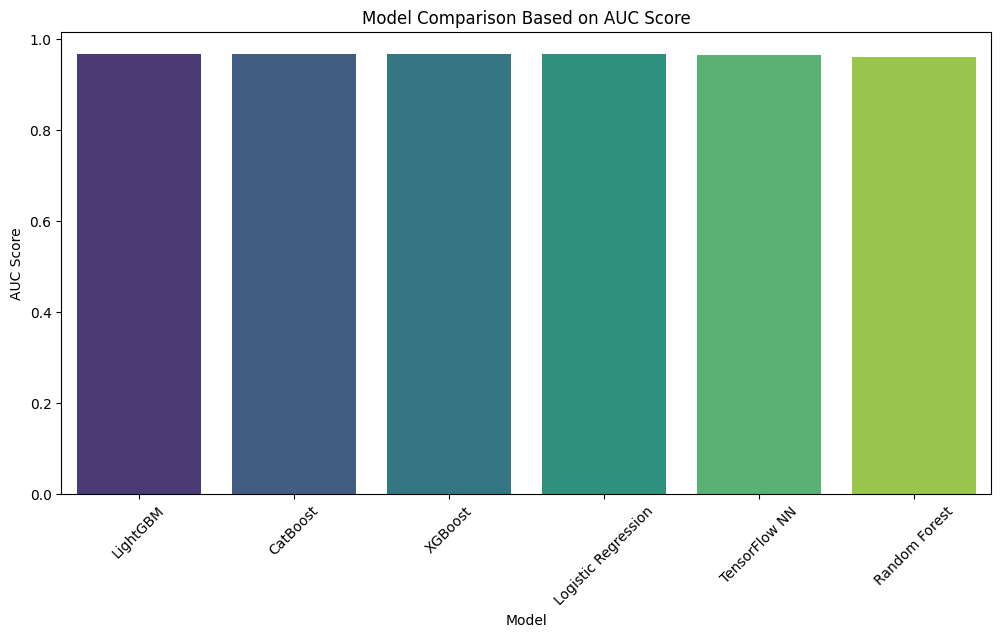

In [ ]:
# 7. Finalize the Dataset for Modeling and Run the Model Harness
# Install necessary libraries in Colab
!pip install catboost tensorflow-addons scikeras tqdm -qqq
!pip install dask[dataframe] -qqq

# Import necessary packages
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Ensure binary 'Solved' column for classification (0 for unsolved, 1 for solved)
df['Solved'] = df['Solved_Yes'].astype(int)

# Define features and target variable
X = df.drop(columns=['Solved', 'Solved_Yes'])  # Drop target and redundant column
y = df['Solved']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

# Combine scaled numerical data with other features
X_train = np.concatenate([X_train_scaled, X_train.select_dtypes(include='bool')], axis=1)
X_test = np.concatenate([X_test_scaled, X_test.select_dtypes(include='bool')], axis=1)

# Define Models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
catboost = cb.CatBoostClassifier(verbose=0, random_state=42)
lightgbm = lgb.LGBMClassifier(random_state=42)

# TensorFlow Neural Network model
def create_nn_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tensorflow_nn = KerasClassifier(model=create_nn_model, epochs=10, batch_size=32, verbose=0)

# Model Training and Evaluation with tqdm for Progress Tracking
models = {
    'Logistic Regression': log_reg,
    'Random Forest': random_forest,
    'XGBoost': xgboost,
    'CatBoost': catboost,
    'LightGBM': lightgbm,
    'TensorFlow NN': tensorflow_nn
}

# Store results in a list
results = []
print("\nStarting model training and evaluation...\n")

for model_name, model in tqdm(models.items(), desc="Training models"):
    print(f"\nTraining {model_name}...")

    # Record start time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Record end time and calculate duration
    end_time = time.time()
    training_time = end_time - start_time

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Append results including training time
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'AUC': auc,
        'Training Time (s)': training_time
    })

    print(f"{model_name} completed with AUC: {auc:.4f}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Training Time: {training_time:.2f} seconds")

# Display Model Performance
results_df = pd.DataFrame(results).sort_values(by='AUC', ascending=False)
print("\nModel performance summary:\n", results_df)

# Plot the Model Performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AUC', data=results_df, palette="viridis")
plt.title('Model Comparison Based on AUC Score')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)
plt.show()


Starting model training and evaluation...



Training models:   0%|          | 0/6 [00:00<?, ?it/s]


Training Logistic Regression...


Training models:  17%|█▋        | 1/6 [00:02<00:10,  2.08s/it]

Logistic Regression completed with AUC: 0.9669, Accuracy: 0.9669, F1 Score: 0.9661, Training Time: 1.84 seconds

Training Random Forest...


Training models:  33%|███▎      | 2/6 [02:36<06:06, 91.66s/it]

Random Forest completed with AUC: 0.9733, Accuracy: 0.9732, F1 Score: 0.9727, Training Time: 147.96 seconds

Training XGBoost...


Training models:  50%|█████     | 3/6 [02:42<02:37, 52.43s/it]

XGBoost completed with AUC: 0.9691, Accuracy: 0.9691, F1 Score: 0.9683, Training Time: 5.38 seconds

Training CatBoost...


Training models:  67%|██████▋   | 4/6 [03:33<01:44, 52.05s/it]

CatBoost completed with AUC: 0.9690, Accuracy: 0.9689, F1 Score: 0.9682, Training Time: 51.19 seconds

Training LightGBM...
[LightGBM] [Info] Number of positive: 504389, number of negative: 504831
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 1009220, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499781 -> initscore=-0.000876
[LightGBM] [Info] Start training from score -0.000876


Training models:  83%|████████▎ | 5/6 [03:37<00:34, 34.53s/it]

LightGBM completed with AUC: 0.9683, Accuracy: 0.9682, F1 Score: 0.9674, Training Time: 2.95 seconds

Training TensorFlow NN...


Training models: 100%|██████████| 6/6 [10:00<00:00, 100.17s/it]

TensorFlow NN completed with AUC: 0.9670, Accuracy: 0.9670, F1 Score: 0.9662, Training Time: 371.70 seconds

Model performance summary:
                  Model  Accuracy  F1 Score       AUC  Training Time (s)
1        Random Forest  0.973239  0.972669  0.973278         147.959867
2              XGBoost  0.969101  0.968335  0.969146           5.382858
3             CatBoost  0.968919  0.968154  0.968964          51.188892
4             LightGBM  0.968217  0.967402  0.968264           2.951088
5        TensorFlow NN  0.967000  0.966230  0.967043         371.699143
0  Logistic Regression  0.966905  0.966146  0.966948           1.839163



<ipython-input-15-9c880b8bd714>:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUC', data=results_df, palette="viridis")


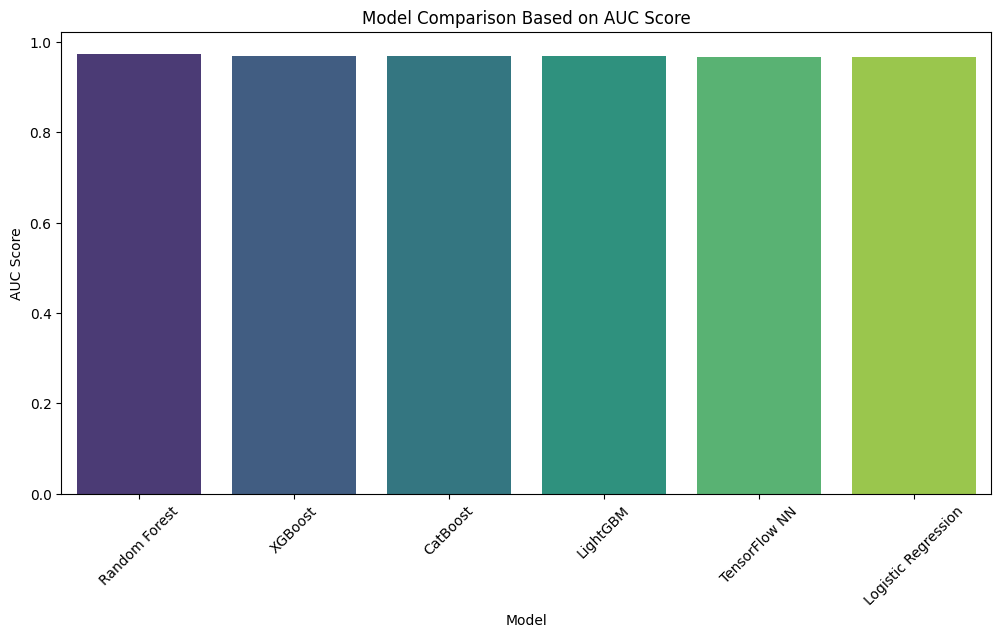

In [ ]:
# Install necessary libraries in Colab
!pip install catboost tensorflow-addons scikeras tqdm imbalanced-learn -qqq
!pip install dask[dataframe] -qqq

# Import necessary packages
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Ensure binary 'Solved' column for classification (0 for unsolved, 1 for solved)
df['Solved'] = df['Solved_Yes'].astype(int)

# Define features and target variable
X = df.drop(columns=['Solved', 'Solved_Yes'])  # Drop target and redundant column
y = df['Solved']

# Balance the dataset using Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

# Combine scaled numerical data with other features
X_train = np.concatenate([X_train_scaled, X_train.select_dtypes(include='bool')], axis=1)
X_test = np.concatenate([X_test_scaled, X_test.select_dtypes(include='bool')], axis=1)

# Define Models
log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(random_state=42)
xgboost = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
catboost = cb.CatBoostClassifier(verbose=0, random_state=42)
lightgbm = lgb.LGBMClassifier(random_state=42)

# TensorFlow Neural Network model
def create_nn_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tensorflow_nn = KerasClassifier(model=create_nn_model, epochs=10, batch_size=32, verbose=0)

# Model Training and Evaluation with tqdm for Progress Tracking
models = {
    'Logistic Regression': log_reg,
    'Random Forest': random_forest,
    'XGBoost': xgboost,
    'CatBoost': catboost,
    'LightGBM': lightgbm,
    'TensorFlow NN': tensorflow_nn
}

# Store results in a list
results = []
print("\nStarting model training and evaluation...\n")

for model_name, model in tqdm(models.items(), desc="Training models"):
    print(f"\nTraining {model_name}...")

    # Record start time
    start_time = time.time()

    # Fit the model
    model.fit(X_train, y_train)

    # Record end time and calculate duration
    end_time = time.time()
    training_time = end_time - start_time

    # Predict and evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Append results including training time
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'AUC': auc,
        'Training Time (s)': training_time
    })

    print(f"{model_name} completed with AUC: {auc:.4f}, Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, Training Time: {training_time:.2f} seconds")

# Display Model Performance
results_df = pd.DataFrame(results).sort_values(by='AUC', ascending=False)
print("\nModel performance summary:\n", results_df)

# Plot the Model Performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AUC', data=results_df, palette="viridis")
plt.title('Model Comparison Based on AUC Score')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.xticks(rotation=45)
plt.show()